In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [2]:
start_year = 2014
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [3]:
n_days = 20

In [4]:
code_dat.loc[:, 'typical_price'] = (code_dat.loc[:, 'High'] + code_dat.loc[:, 'Low'] + code_dat.loc[:, 'Close']) / 3

In [5]:
rolling = code_dat.rolling(window=n_days)

In [14]:
sma = rolling['typical_price'].mean()
mad = rolling['typical_price'].apply(lambda x: np.sum(np.abs((x - x.mean())))/len(x))

In [15]:
cci = (code_dat.loc[:, 'typical_price'] - sma) / mad / 0.015

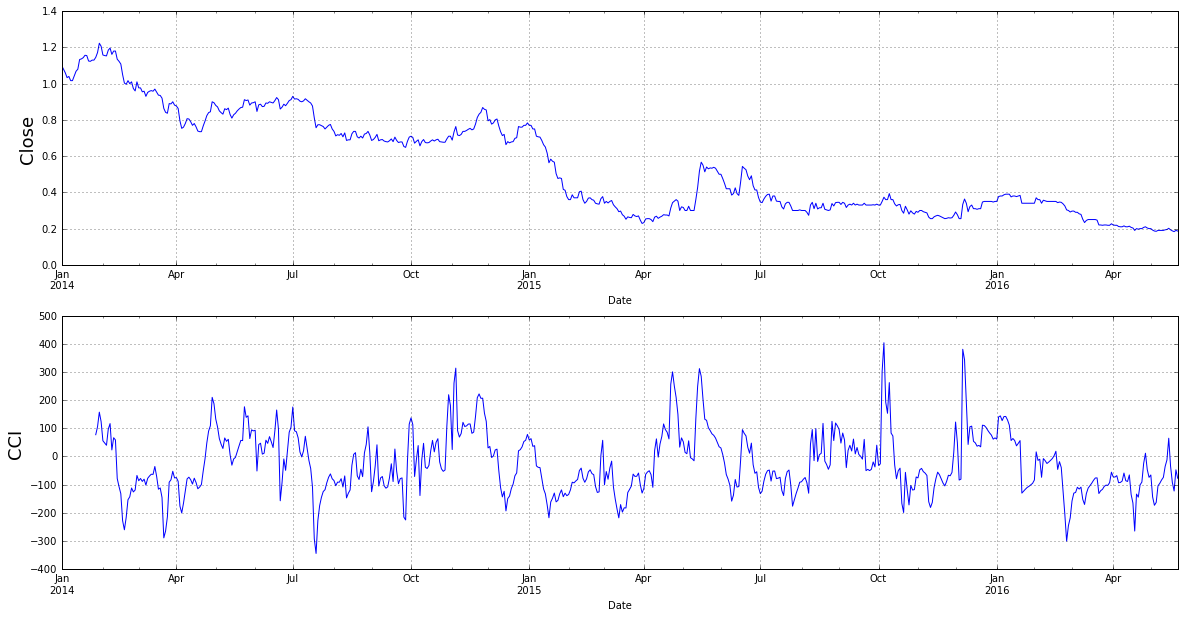

In [19]:
plt.figure(figsize=(20, 10))
ax_up = plt.subplot(211)
code_dat.loc[:, 'typical_price'].plot(ax=ax_up)
ax_up.set_ylabel('Close', fontsize=18)
plt.grid()
ax_down = plt.subplot(212)
cci.plot(ax=ax_down)
ax_down.set_ylabel('CCI', fontsize=18)
plt.grid()